<a href="https://colab.research.google.com/github/shubhamg2205/6857-proj/blob/main/Copy_of_Copy_of_Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import sklearn.preprocessing


In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
df=pd.read_csv('/content/drive/MyDrive/CustomerData_project_genpact/orders_categories_time.csv')
df.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB


In [100]:
df.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [101]:
df=df.drop(columns=['order','Baby%','Health%','Pets%'])

In [102]:
df.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%
0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00
1,0,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00
2,0,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53
3,1,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87
4,1,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00


In [103]:
for i in df.columns:
  print(df[i].value_counts())

6560     52
7688     40
7776     37
657      36
4713     31
         ..
4764      1
4763      1
4762      1
4761      1
10238     1
Name: customer, Length: 10239, dtype: int64
25     850
27     824
26     817
28     800
31     800
      ... 
136      1
138      1
155      1
146      1
282      1
Name: total_items, Length: 173, dtype: int64
 0.00      3985
 100.00     396
 9.64       121
 0.16        55
 0.17        54
           ... 
 69.73        1
 26.35        1
 47.21        1
-1.99         1
 32.89        1
Name: discount%, Length: 3579, dtype: int64
1    6237
7    5160
2    4970
3    4708
4    4081
5    2538
6    2306
Name: weekday, dtype: int64
22    2491
21    2306
12    2211
11    2184
20    2040
10    2024
13    1983
23    1875
19    1775
18    1539
17    1455
9     1401
16    1281
15    1268
14    1222
8      926
0      926
7      358
1      310
6      125
2      119
3       76
5       57
4       48
Name: hour, dtype: int64
0.00      4946
100.00     728
21.12       16
10.67 

In [104]:
scaler = sklearn.preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df)


In [105]:
df_scaled=pd.DataFrame(features_normal,columns=df.columns)
df_scaled.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%
0,0.000000,0.148148,0.533939,0.500000,0.565217,0.0946,0.8706,0.0348,0.0000,0.0000
1,0.000000,0.124579,0.401877,0.666667,0.565217,0.1587,0.7580,0.0622,0.0212,0.0000
2,0.000000,0.168350,0.503966,0.500000,0.565217,0.1688,0.5675,0.0337,0.1648,0.0653
3,0.000098,0.188552,0.494460,0.000000,0.521739,0.2881,0.3599,0.1178,0.0462,0.0287
4,0.000098,0.175084,0.505359,0.166667,0.478261,0.2413,0.6038,0.0778,0.0772,0.0000


In [106]:
wcss=[]

for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=90)
  kmeans.fit(features_normal)

  wcss.append(kmeans.inertia_)


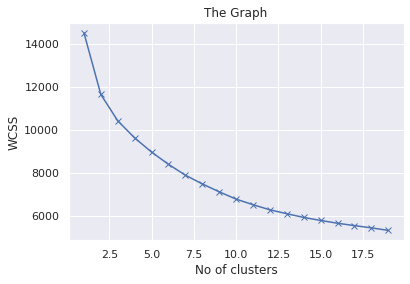

In [107]:
#plot elbow graph 
sns.set()
plt.plot(range(1,20),wcss,'bx-')
plt.title('The Graph')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=4)
Y=kmeans.fit_predict(features_normal)

In [109]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
df_labels = pd.concat((df,labels),axis=1)
df_labels= df_labels.rename({0:'labels'},axis=1)

In [110]:
df_labels.head()

,customer,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,labels
0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,3
1,0,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,3
2,0,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,2
3,1,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,2
4,1,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


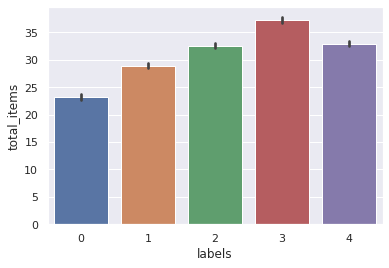

In [111]:
sns.barplot(df_labels['labels'],df['total_items']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


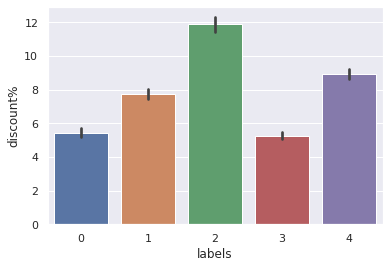

In [112]:
sns.barplot(df_labels['labels'],df['discount%']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


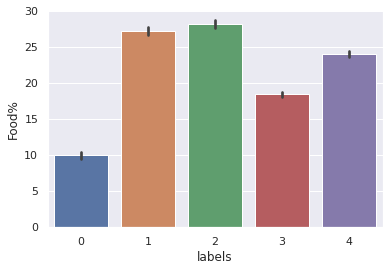

In [114]:
sns.barplot(df_labels['labels'],df['Food%']);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


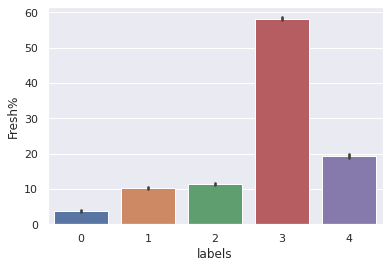

In [115]:
sns.barplot(df_labels['labels'],df['Fresh%']);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


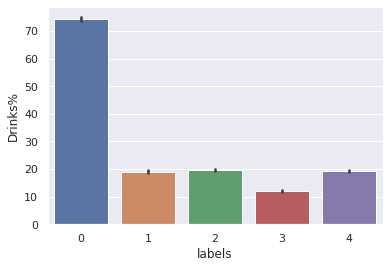

In [116]:
sns.barplot(df_labels['labels'],df['Drinks%']);

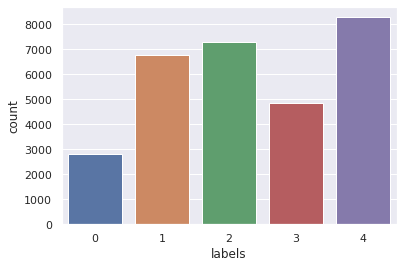

In [117]:
sns.countplot(data=df_labels,x='labels')

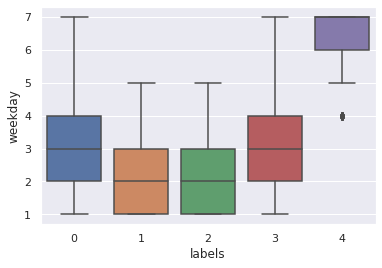

In [118]:
sns.boxplot(data=df_labels,x='labels',y='weekday');

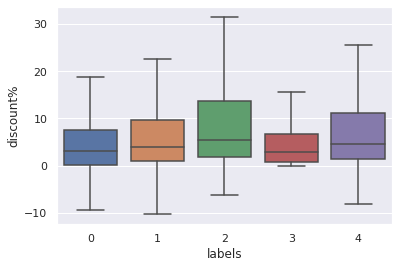

In [119]:
sns.boxplot(data=df_labels,x='labels',y='discount%',showfliers=False);

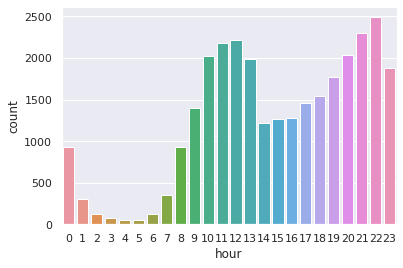

In [120]:
sns.countplot(x=df_labels['hour'])

In [130]:
labeled=df_labels.to_csv('customer_data_with_labels.csv',index=False)

In [121]:
label = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
df_pca = pd.concat((df_scaled,labels),axis=1)
df_pca= df_pca.rename({0:'labels'},axis=1)

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['col1', 'col2','col3'])

In [123]:
principalDf.head()

,col1,col2,col3
0,-0.762019,-0.381829,-0.260499
1,-0.781665,-0.192026,-0.270252
2,0.236192,-0.169963,-0.347420
3,0.339630,-0.474652,-0.463674
4,0.295001,-0.451771,-0.379945


In [124]:
finalDf = pd.concat([principalDf, df_labels[['labels']]], axis = 1)
finalDf.head()

,col1,col2,col3,labels
0,-0.762019,-0.381829,-0.260499,3
1,-0.781665,-0.192026,-0.270252,3
2,0.236192,-0.169963,-0.347420,2
3,0.339630,-0.474652,-0.463674,2
4,0.295001,-0.451771,-0.379945,2


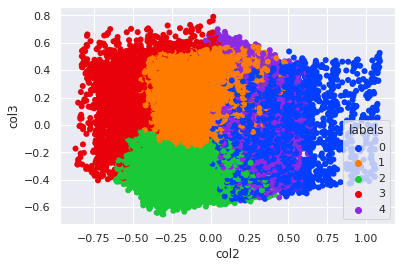

In [129]:
sns.scatterplot(x='col2',y='col3',data=finalDf,hue='labels',palette='bright',edgecolor='none')

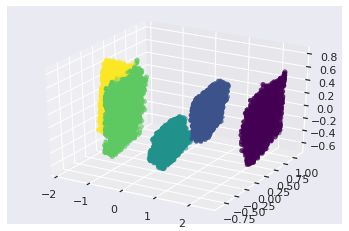

In [126]:
ax = plt.axes(projection='3d')
ax.scatter(finalDf['col1'], finalDf['col2'], finalDf['col3'],c=finalDf['labels'] ,cmap='viridis',linewidth=0.5);

In [ ]:
df_corr=df.corr()

In [ ]:
sns.heatmap(df_corr,annot=False)